## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

## Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

## Assigning classes

In [3]:
df_fake["class"] = 0
df_true["class"] = 1

## Merging and dropping unimportant columns

In [4]:
df_merge = pd.concat([df_fake, df_true], axis = 0)

In [5]:
df = df_merge.drop(["title", "subject","date"], axis = 1)
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

## Removing unnecessary words and stop words

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

def wordprocess(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)  
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    text = ' '.join(filtered_tokens)
    
    return text.strip()

df["text"] = df["text"].apply(wordprocess)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Splitting into train and test datasets

In [7]:
x = df["text"]
y = df["class"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Hyperparameter Tuning

### Number of Estimators Tuning

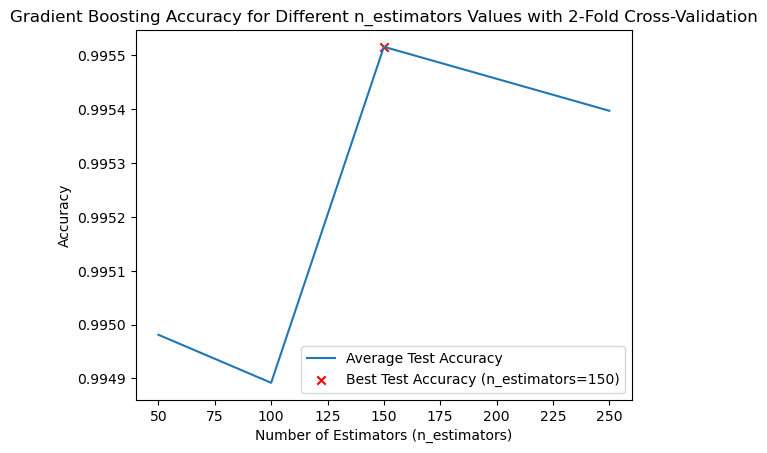

Best n_estimators: 150
Corresponding Test Accuracy: 0.9955156730149448


In [10]:
n_estimators_values = [50, 100, 150, 200, 250]

test_accuracies = []

for n_estimators in n_estimators_values:
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)

    scores = cross_val_score(gb_model, xv_train, y_train, cv=2, scoring='accuracy')
    
    mean_test_accuracy = np.mean(scores)
    
    test_accuracies.append(mean_test_accuracy)

best_index = np.argmax(test_accuracies)
best_n_estimators = n_estimators_values[best_index]

plt.plot(n_estimators_values, test_accuracies, label='Average Test Accuracy')
plt.scatter(best_n_estimators, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (n_estimators={best_n_estimators})')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Accuracy for Different n_estimators Values with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best n_estimators: {best_n_estimators}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

### Learning Rates Tunings

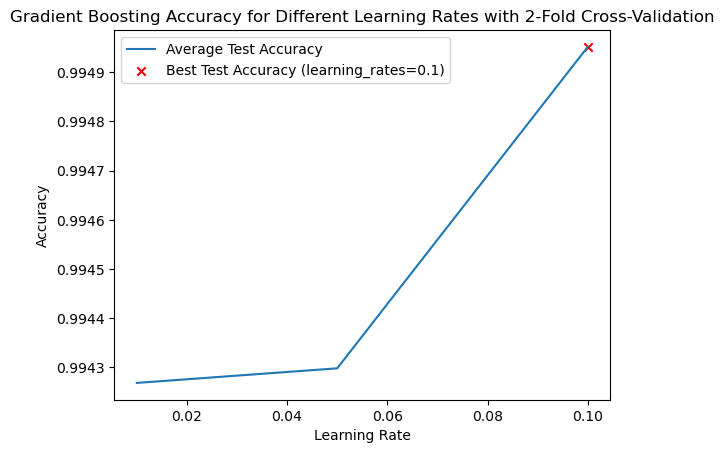

Best Learning Rate: 0.1
Corresponding Test Accuracy: 0.9949514271345706


In [11]:
learning_rates = [0.1, 0.05, 0.01]

test_accuracies = []

for learning_rate in learning_rates:
    gb_model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=best_n_estimators, random_state=42)

    scores = cross_val_score(gb_model, xv_train, y_train, cv=2, scoring='accuracy')
    
    mean_test_accuracy = np.mean(scores)
    
    test_accuracies.append(mean_test_accuracy)

best_index = np.argmax(test_accuracies)
best_learning_rate = learning_rates[best_index]

plt.plot(learning_rates, test_accuracies, label='Average Test Accuracy')
plt.scatter(best_learning_rate, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (learning_rates={best_learning_rate})')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Accuracy for Different Learning Rates with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best Learning Rate: {best_learning_rate}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

### Max Depths Tuning

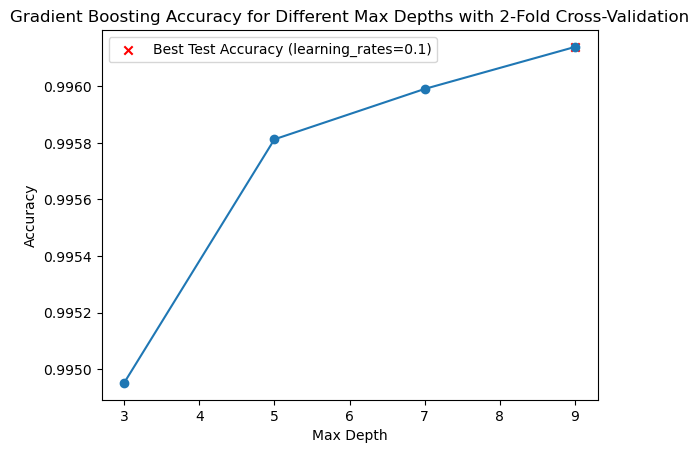

Best Max Depth: 9
Corresponding Test Accuracy: 0.9961393154265614


In [12]:
max_depths = [3, 5, 7, 9]  # Different values for max_depth

test_accuracies = []

for max_depth in max_depths:
    gb_model = GradientBoostingClassifier(max_depth=max_depth, n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)

    scores = cross_val_score(gb_model, xv_train, y_train, cv=2, scoring='accuracy')
    
    mean_test_accuracy = np.mean(scores)
    
    test_accuracies.append(mean_test_accuracy)

best_index = np.argmax(test_accuracies)
best_max_depth = max_depths[best_index]

plt.plot(max_depths, test_accuracies, label='Average Test Accuracy')
plt.scatter(best_max_depth, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (learning_rates={best_learning_rate})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Accuracy for Different Max Depths with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best Max Depth: {best_max_depth}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

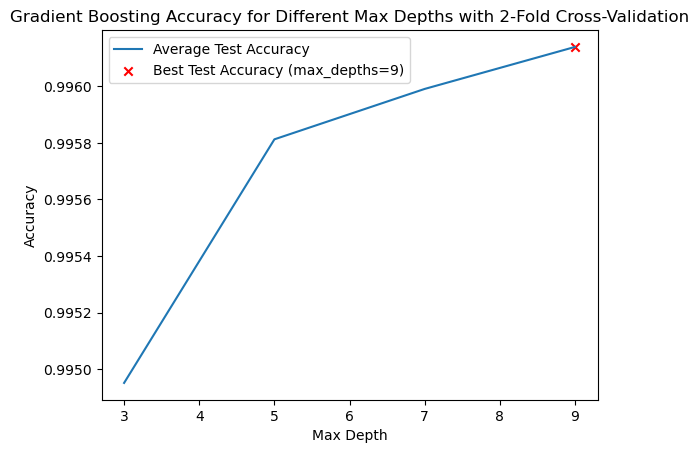

Best Max Depth: 9
Corresponding Test Accuracy: 0.9961393154265614


In [17]:
plt.plot(max_depths, test_accuracies, label='Average Test Accuracy')
plt.scatter(best_max_depth, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (max_depths={best_max_depth})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Accuracy for Different Max Depths with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best Max Depth: {best_max_depth}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

## Analyzing the Best Machine Learning Algorithm

### Confusion Matrix

Test Accuracy: 0.998218262806236


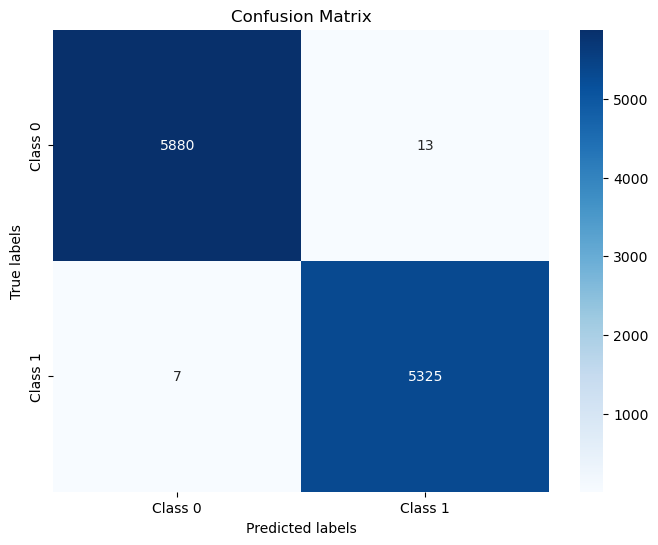

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

best_GB = GradientBoostingClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
best_GB.fit(xv_train,y_train)

test_accuracy = best_GB.score(xv_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_rfc = best_GB.predict(xv_test)

conf_matrix = confusion_matrix(y_test, pred_rfc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [15]:
from sklearn.metrics import classification_report, roc_auc_score

print("\nClassification Report:")
print(classification_report(y_test, pred_rfc))

roc_auc = roc_auc_score(y_test, pred_rfc)
print("\nROC AUC Score:", roc_auc)

from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(y_test, pred_rfc)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, pred_rfc, average='weighted')

print("Classification Report:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1_score))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5893
           1       1.00      1.00      1.00      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225


ROC AUC Score: 0.9982405823329241
Classification Report:
Accuracy: 0.9982
Precision: 0.9982
Recall: 0.9982
F1-score: 0.9982


### ROC Curve

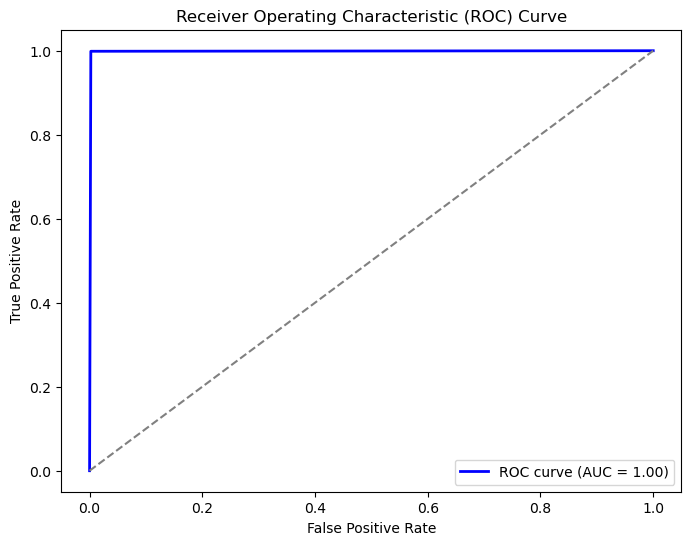

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()